In [24]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras


In [25]:
import PIL
import cv2
import os

In [26]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [27]:
dataset_url

'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'

In [28]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [29]:
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,cache_dir='/content/drive/MyDrive/Deep_leearning/17_data_augmentaion', untar=True)

In [30]:
data_dir

'/content/drive/MyDrive/Deep_leearning/17_data_augmentaion/datasets/flower_photos'

In [31]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

PosixPath('/content/drive/MyDrive/Deep_leearning/17_data_augmentaion/datasets/flower_photos')

In [32]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('/content/drive/MyDrive/Deep_leearning/17_data_augmentaion/datasets/flower_photos/roses/14810868100_87eb739f26_m.jpg'),
 PosixPath('/content/drive/MyDrive/Deep_leearning/17_data_augmentaion/datasets/flower_photos/roses/1446090416_f0cad5fde4.jpg'),
 PosixPath('/content/drive/MyDrive/Deep_leearning/17_data_augmentaion/datasets/flower_photos/roses/15319767030_e6c5602a77_m.jpg'),
 PosixPath('/content/drive/MyDrive/Deep_leearning/17_data_augmentaion/datasets/flower_photos/roses/15032112248_30c5284e54_n.jpg'),
 PosixPath('/content/drive/MyDrive/Deep_leearning/17_data_augmentaion/datasets/flower_photos/roses/7211616670_2d49ecb3a5_m.jpg')]

In [33]:
len(list(data_dir.glob('*/*.jpg')))

3670

In [34]:
image_count=len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [35]:
rose=list(data_dir.glob('roses/*'))

In [36]:
len(rose)

641

In [37]:
rose[:5]

[PosixPath('/content/drive/MyDrive/Deep_leearning/17_data_augmentaion/datasets/flower_photos/roses/14810868100_87eb739f26_m.jpg'),
 PosixPath('/content/drive/MyDrive/Deep_leearning/17_data_augmentaion/datasets/flower_photos/roses/1446090416_f0cad5fde4.jpg'),
 PosixPath('/content/drive/MyDrive/Deep_leearning/17_data_augmentaion/datasets/flower_photos/roses/15319767030_e6c5602a77_m.jpg'),
 PosixPath('/content/drive/MyDrive/Deep_leearning/17_data_augmentaion/datasets/flower_photos/roses/15032112248_30c5284e54_n.jpg'),
 PosixPath('/content/drive/MyDrive/Deep_leearning/17_data_augmentaion/datasets/flower_photos/roses/7211616670_2d49ecb3a5_m.jpg')]

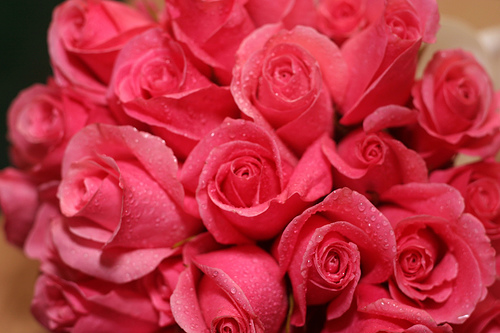

In [38]:
PIL.Image.open(rose[1])

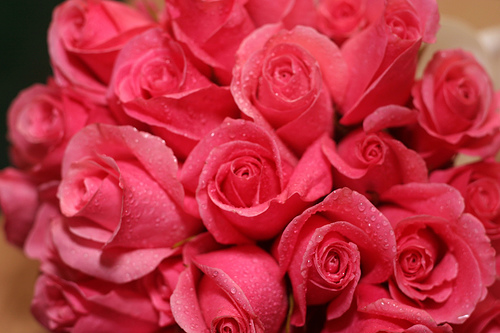

In [39]:
PIL.Image.open(str(rose[1]))

In [40]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}


In [41]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [44]:
flowers_images_dict['roses'][1]


PosixPath('/content/drive/MyDrive/Deep_leearning/17_data_augmentaion/datasets/flower_photos/roses/1446090416_f0cad5fde4.jpg')

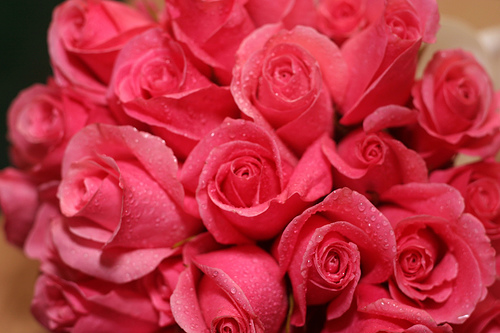

In [45]:
PIL.Image.open(flowers_images_dict['roses'][1])

In [46]:
img=PIL.Image.open(flowers_images_dict['roses'][1])

In [48]:
img.shape

AttributeError: ignored

In [56]:
img=cv2.imread(str(flowers_images_dict['roses'][0]))

In [57]:
img.shape

(240, 178, 3)

In [58]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [55]:
img.shape

(240, 178, 3)

In [59]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [70]:
X,y=[],[]
for flower_name,images in flowers_images_dict.items():
  for image in images:
    img=cv2.imread(str(image))
    img=cv2.resize(img,(180,180))
    X.append(img)
    y.append(flowers_labels_dict[flower_name])


In [71]:
X=np.array(X)
y=np.array(y)

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=5)

In [73]:
X_train_flatten=X_train/255
X_test_flatten=X_test/255

In [74]:
X_train_flatten.shape

(2936, 180, 180, 3)

In [77]:
model=keras.Sequential([
                        keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',input_shape=(180,180,3),activation='relu'),
                        keras.layers.MaxPooling2D((2,2)),
                        keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'),
                        keras.layers.MaxPooling2D((2,2)),
                        keras.layers.Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'),
                        keras.layers.MaxPooling2D((2,2)),

                        keras.layers.Flatten(),
                       keras.layers.Dense(256,activation='relu'),
                       keras.layers.Dense(5,activation='softmax')
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
              )
              
model.fit(X_train_flatten,y_train, epochs=30)  

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


92/92 [==============================] - 18s 83ms/step - loss: 1.3610 - accuracy: 0.4281
Epoch 2/30
92/92 [==============================] - 7s 78ms/step - loss: 1.0034 - accuracy: 0.5981
Epoch 3/30
92/92 [==============================] - 7s 78ms/step - loss: 0.7988 - accuracy: 0.6931
Epoch 4/30
92/92 [==============================] - 7s 78ms/step - loss: 0.5915 - accuracy: 0.7810
Epoch 5/30
92/92 [==============================] - 7s 79ms/step - loss: 0.3764 - accuracy: 0.8648
Epoch 6/30
92/92 [==============================] - 7s 78ms/step - loss: 0.2150 - accuracy: 0.9292
Epoch 7/30
92/92 [==============================] - 7s 78ms/step - loss: 0.1202 - accuracy: 0.9666
Epoch 8/30
92/92 [==============================] - 7s 79ms/step - loss: 0.0705 - accuracy: 0.9802
Epoch 9/30
92/92 [==============================] - 7s 79ms/step - loss: 0.0945 - accuracy: 0.9789
Epoch 10/30
92/92 [==============================] - 7s 78ms/step - loss: 0.0476 - accuracy: 0.9881
Epoch 11/30
92/92 [

In [78]:
model.evaluate(X_test_flatten,y_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


23/23 [==============================] - 1s 45ms/step - loss: 3.0116 - accuracy: 0.6376


[3.0115606784820557, 0.6376021504402161]

In [79]:
y_predict=model.predict(X_train_flatten)

In [80]:
y_predict[:5]

array([[3.0295218e-14, 1.0000000e+00, 8.3818005e-18, 8.1992182e-29,
        5.3798785e-17],
       [1.3784300e-09, 5.0778656e-12, 4.4018065e-09, 9.9999833e-01,
        1.6941106e-06],
       [1.5425891e-11, 1.2396974e-10, 1.0000000e+00, 2.4732835e-18,
        5.0430497e-12],
       [6.8009953e-09, 2.7429653e-05, 9.9997258e-01, 1.0604973e-15,
        4.2174353e-08],
       [5.2821204e-05, 9.9994719e-01, 1.6002554e-09, 4.5771852e-23,
        4.3313086e-09]], dtype=float32)

In [81]:
y_predict=[np.argmax(i) for i in y_predict]

In [82]:
y_predict[:5]

[1, 3, 2, 2, 1]

**Improve Test Accuracy Using Data Augmentation**

In [91]:
from tensorflow.keras import layers
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(180, 
                                                              180,
                                                              3)), 
                                                 
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

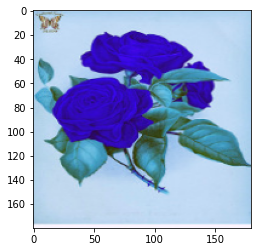

In [92]:
plt.imshow(X[0])

In [93]:
plt.imshow(data_augmentation(X)[0])

ResourceExhaustedError: ignored